In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
budget_threshold = 3000
df = pd.read_csv('final_dataset.csv')
df.tail()

,Trip_ID,Date,City,Vehicle_Type,Fuel_Type,Route,Distance_km,Load_Weight_kg,Total_Fuel_Cost,Petrol_Price,Diesel_Price,Temp_Mean_C,Precipitation_mm
96539,373426a3-4dca-4c65-a1e1-f84cd14c1e63,2017-06-16,Mumbai,Motorcycle,Petrol,Route_B,1473.65,0.00,2511.75,76.7,59.9,28.1,10.0
96540,3da4c805-1c33-497c-9f7c-8f122361eb44,2017-06-16,Mumbai,Truck,Diesel,Route_C,1294.05,14947.10,18594.51,76.7,59.9,28.1,10.0
96541,2ad83eea-68fa-4019-b129-a4b6303f20d2,2017-06-16,Mumbai,Van,Diesel,Route_C,418.42,660.99,2111.37,76.7,59.9,28.1,10.0
96542,8ff04c6a-83dc-4bf5-9b78-e4d22b935b86,2017-06-16,Mumbai,Van,Diesel,Route_C,745.21,348.68,3741.33,76.7,59.9,28.1,10.0
96543,8d2d1f12-c6ee-4e59-b7a7-fb299cc8c28d,2017-06-16,Mumbai,Motorcycle,Petrol,Route_A,225.99,0.00,385.19,76.7,59.9,28.1,10.0


In [3]:
y = (df['Total_Fuel_Cost'] > budget_threshold).astype(int)
X = df.drop(['Total_Fuel_Cost', 'Trip_ID', 'Date'], axis=1)

print(f"Created new target: 'Over_Budget'. Threshold = ₹{budget_threshold}")
print(f"Percentage of trips over budget: {y.mean() * 100:.2f}%")

Created new target: 'Over_Budget'. Threshold = ₹3000
Percentage of trips over budget: 81.39%


In [4]:
categorical_features = ['City', 'Vehicle_Type', 'Fuel_Type', 'Route']
numerical_features = X.drop(columns=categorical_features).columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [6]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.27%


In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Under Budget (0)', 'Over Budget (1)']))


Classification Report:
                  precision    recall  f1-score   support

Under Budget (0)       0.95      0.95      0.95      3593
 Over Budget (1)       0.99      0.99      0.99     15716

        accuracy                           0.98     19309
       macro avg       0.97      0.97      0.97     19309
    weighted avg       0.98      0.98      0.98     19309




Confusion Matrix:


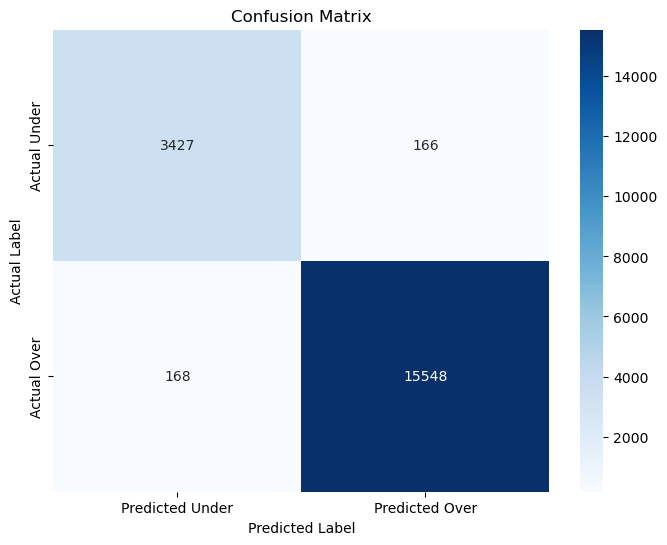

In [9]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Under', 'Predicted Over'], 
            yticklabels=['Actual Under', 'Actual Over'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [10]:
X_sample = X_test.iloc[6]
y_actual_cost = df.loc[X_sample.name]['Total_Fuel_Cost']
y_actual_status = y_test.iloc[0] # 0 or 1

prediction = model.predict(X_sample.to_frame().T)[0]
probabilities = model.predict_proba(X_sample.to_frame().T)[0]
prob_over_budget = probabilities[1]

print(f"Trip Details: \n{X_sample}\n")
print(f"Actual Trip Cost:       ₹{y_actual_cost:.2f}")
print(f"Budget Threshold:       ₹{budget_threshold}")
print(f"Actual Status:          {'Over Budget' if y_actual_status == 1 else 'Under Budget'}")
print("---")
print("Model's Prediction Report:")
print(f"Probability of 'Over Budget': {prob_over_budget * 100:.2f}%")
print(f"Final Decision (Prediction):  {'Over Budget' if prediction == 1 else 'Under Budget'}")
print("---")

if prediction == y_actual_status:
    print("Result: The model's prediction was CORRECT. ✅")
else:
    print("Result: The model's prediction was INCORRECT. ❌")

Trip Details: 
City                Kolkata
Vehicle_Type            Van
Fuel_Type            Diesel
Route               Route_B
Distance_km         2771.18
Load_Weight_kg       357.93
Petrol_Price         106.03
Diesel_Price          92.76
Temp_Mean_C            28.0
Precipitation_mm       16.0
Name: 25556, dtype: object

Actual Trip Cost:       ₹22682.37
Budget Threshold:       ₹3000
Actual Status:          Over Budget
---
Model's Prediction Report:
Probability of 'Over Budget': 100.00%
Final Decision (Prediction):  Over Budget
---
Result: The model's prediction was CORRECT. ✅


In [11]:
X_sample = X_test.iloc[0]
X_sample

City                Kolkata
Vehicle_Type            Van
Fuel_Type            Diesel
Route               Route_B
Distance_km         1195.64
Load_Weight_kg       376.31
Petrol_Price         106.03
Diesel_Price          92.76
Temp_Mean_C            25.4
Precipitation_mm        0.0
Name: 34448, dtype: object

In [12]:
import joblib
joblib.dump(model, 'Classification-model.pkl')

['Classification-model.pkl']